# Using Age, Resting Blood Pressure, and Cholesterol Levels To Predict Electrocardiographic Results

#### Can we use age, blood pressure, and cholesterol to predict ECG results which are prevously associated with heart disease?
##### By: Jennifer Bui, Alyssa Tran, Saanvi Jassal, Qi Xu

### Introduction:

##### Background Information:
In the United States, almost half of adults suffer from risk factors leading to heart disease, such as high blood pressure, high cholesterol, and smoking (CDC, 2023). The term “heart disease” is an umbrella term that encompasses several types of diseases like coronary artery disease, heart attack, arrhythmia (fluttering feelings in the chest), heart failure, etc., which has resulted in the death of many. Some symptoms of such include chest pain, shortness of breath, fatigue or fainting, etc. To determine the signals of different heart conditions, doctors may use an electrocardiogram (ECG), which is a machine that is able to record the electrical signals in the heart and used to quickly detect heart problems (Mayo Clinic, 2023). According to the Mayo Clinic (2023), when the heart muscle becomes thickened, it reduces the efficiency of the heart due to a decrease in the amount of blood pumped with each ventricular contraction. This thickening of the heart muscle is called left ventricular hypertrophic myopathy and has been linked to an increased risk of heart attack, stroke, arrhythmia, etc. (MyHealth.Alberta, 2022). 

##### Dataset description:
The dataset we have chosen is the Heart Disease Dataset from “https://archive.ics.uci.edu/”, which includes 14 attributes with 4 databases of Cleveland, Hungary, Switzerland, and the VA Long Beach. One of the goals of this dataset is to predict if the individual has heart disease or not based on the attributes given. For our project, we will use the database of Cleveland to exclude any confounders which may occur due to environmental factors, such as differences in medical access in each country. 

##### Question: 
The goal of our study is to find the presence of heart disease in a patient. Heart disease is a condition that unfortunately takes the lives of more people than we’d like. By knowing what certain factors could contribute to the disease, it could guide and help us to live a healthier and heart-ier life, thus reducing the death of many. Through this project, we want to evaluate the chosen predictors by using resting electrocardiographic (ECG) results as our classifier. 

The variables that we chose for our analysis are as follows:

- `age`: age of patient in years
- `trestbps`: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholesterol in mg/dl
- `restecg`: resting electrocardiographic results

In this dataset, our dependant variable `restecg` is given three values:

- **Value 0 :** normal
A normal result indicates a regular sinus rhythm of 60 - 100 beats per minute (82 bpm in this case). In this recording, all important intervals are within normal limits. 

- **Value 1:** having ST-T wave abnormality (T wave inversions and/or ST elevation of depression of > 0.05mV)
The most common ECG changes are nonspecific ST-segment and T-wave abnormalities. An abnormal ECG may be a sign that you've had a heart attack before or that you're at risk for one in the near future. 

- **Value 2:** showing probable or definite left ventricular hypertrophy by Estes’ criteria
Hypertrophy is a condition that affects the left ventricle, which is the main pumping chamber of the heart. Over time, the heart can't take in or pump out enough blood during each heartbeat to supply the body's needs. This can lead to severe problems such as heart failure, sudden cardiac arrest and ischemic stroke.

We used age, resting blood pressure and cholesterol as predictors for our predictive model because from conducting research, we believe these predictors can provide insights on an individual's cardiovascular health, which would potentially affect their resting ECG results. Khane et al. (2011) suggested that the positive relationship between the aging process is often associated with extensive changes in heart-related conditions, and abnormal ECG results are highly reliable. Another study viewed and identified the relationship between high blood pressure and heart disease as well, in which it could lead to the disease (Bhatt, 2016). This is due to the fact that high blood pressure causes the heart to pump harder in order to deliver blood, which is straining to the heart. This also causes the heart to enlarge, therefore causing abnormal ECG results. Other studies show and discuss the association between high cholesterol levels and ECG abnormalities. According to a study conducted by Ebong et al. (2012), high blood glucose levels showed a strong association between ECG abnormalities. These abnormalities have been identified as significant predictors for coronary heart diseases (Ebong, 2012). 

**Thus, the question we will be trying to address is: Can we predict ECG readings that could suggest the existence of heart disease using age, cholesterol, and blood pressure using a k-nn classification model?**


### Methods:

##### Outline:
- Transform the original dataset and tidy it into a new dataset, consisting only of the variables of interest: age, resting blood pressure, cholesterol, and resting electrocardiographic results. These variables were chosen based on our previous background knowledge of factors contributing to heart disease. 
- Using our tidy data, we will split our data frame into 75% training and 25% testing with age, resting blood pressure, and cholesterol as our predictors to predict the resting electrocardiographic restults.
- With the training data, we will try to find the distribution of different types of resting ECG results based on different types of body markers: Age vs. Resting Blood Pressure and Age vs. Cholesterol. 
- This will be done with scatterplots, with age on the x-axis, either resting blood pressure or cholesterol on the y-axis, and setting the aesthetics coloring for “Resting ECG Results” to classify different types of resting ECG. 
- To predict which class of resting ECG the new observation belongs to, we will create our K-nearest neighbor classification model with only the training set and choose the best K. 
- With the best model, we will try to predict a new patient's resting ECG results and see which variable is the most useful for this.

### Preliminary Exploratory Data Analysis:

Load neccessary packages to read the unprocessed heart disease dataset from the web.

In [24]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows=6)

In [25]:
set.seed(209)
#reading the dataset from the URL
heart_disease_data <- read_csv("https://raw.githubusercontent.com/QiXu2022/dsci-100-project-Group_66/main/heart_disease_uci.csv")
heart_disease_data <- mutate(heart_disease_data, restecg = as_factor(restecg))

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
#tidying the data
tidy_data<-heart_disease_data |>
    filter(dataset=="Cleveland") |>
    select(age, trestbps, chol, restecg) 
tidy_data

age,trestbps,chol,restecg
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,lv hypertrophy
67,160,286,lv hypertrophy
67,120,229,lv hypertrophy
⋮,⋮,⋮,⋮
57,130,236,lv hypertrophy
38,138,175,normal
28,130,132,lv hypertrophy


**Table 1**: Tidy Data

Use `summary()` to find the summary statistics of tidy data.

In [27]:
#summary tables of training dataset
summary(tidy_data)

str(tidy_data)

      age           trestbps          chol                   restecg   
 Min.   :28.00   Min.   : 94.0   Min.   :126.0   lv hypertrophy  :149  
 1st Qu.:47.75   1st Qu.:120.0   1st Qu.:211.0   normal          :151  
 Median :55.50   Median :130.0   Median :240.5   st-t abnormality:  4  
 Mean   :54.35   Mean   :131.7   Mean   :246.3                         
 3rd Qu.:61.00   3rd Qu.:140.0   3rd Qu.:275.0                         
 Max.   :77.00   Max.   :200.0   Max.   :564.0                         

tibble [304 × 4] (S3: tbl_df/tbl/data.frame)
 $ age     : num [1:304] 63 67 67 37 41 56 62 57 63 53 ...
 $ trestbps: num [1:304] 145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num [1:304] 233 286 229 250 204 236 268 354 254 203 ...
 $ restecg : Factor w/ 3 levels "lv hypertrophy",..: 1 1 1 2 1 2 1 2 1 1 ...


##### Split the data into a training and testing set
Split our tidied dataset into 75% training and 25% testing sets with the `initial_split` function.

In [28]:
heart_split<- initial_split(tidy_data, prop=0.75, strata=restecg)
heart_train<- training(heart_split)
heart_test<-testing(heart_split)

#### Building a model using age, trestbps and chol to predict restecg by k-nn classification.

Use 5-fold cross validation method with the `recipe`, `nearest_neighbors`, `vfold_cv`, and `workflow` functions to find the optimal k value with the highest accuracy from the training data set.

! Fold2: internal:
  No observations were detected in `truth` for level(s): 'st-t abnormality'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'st-t abnormality'
  Computation will proceed by ignoring those levels.



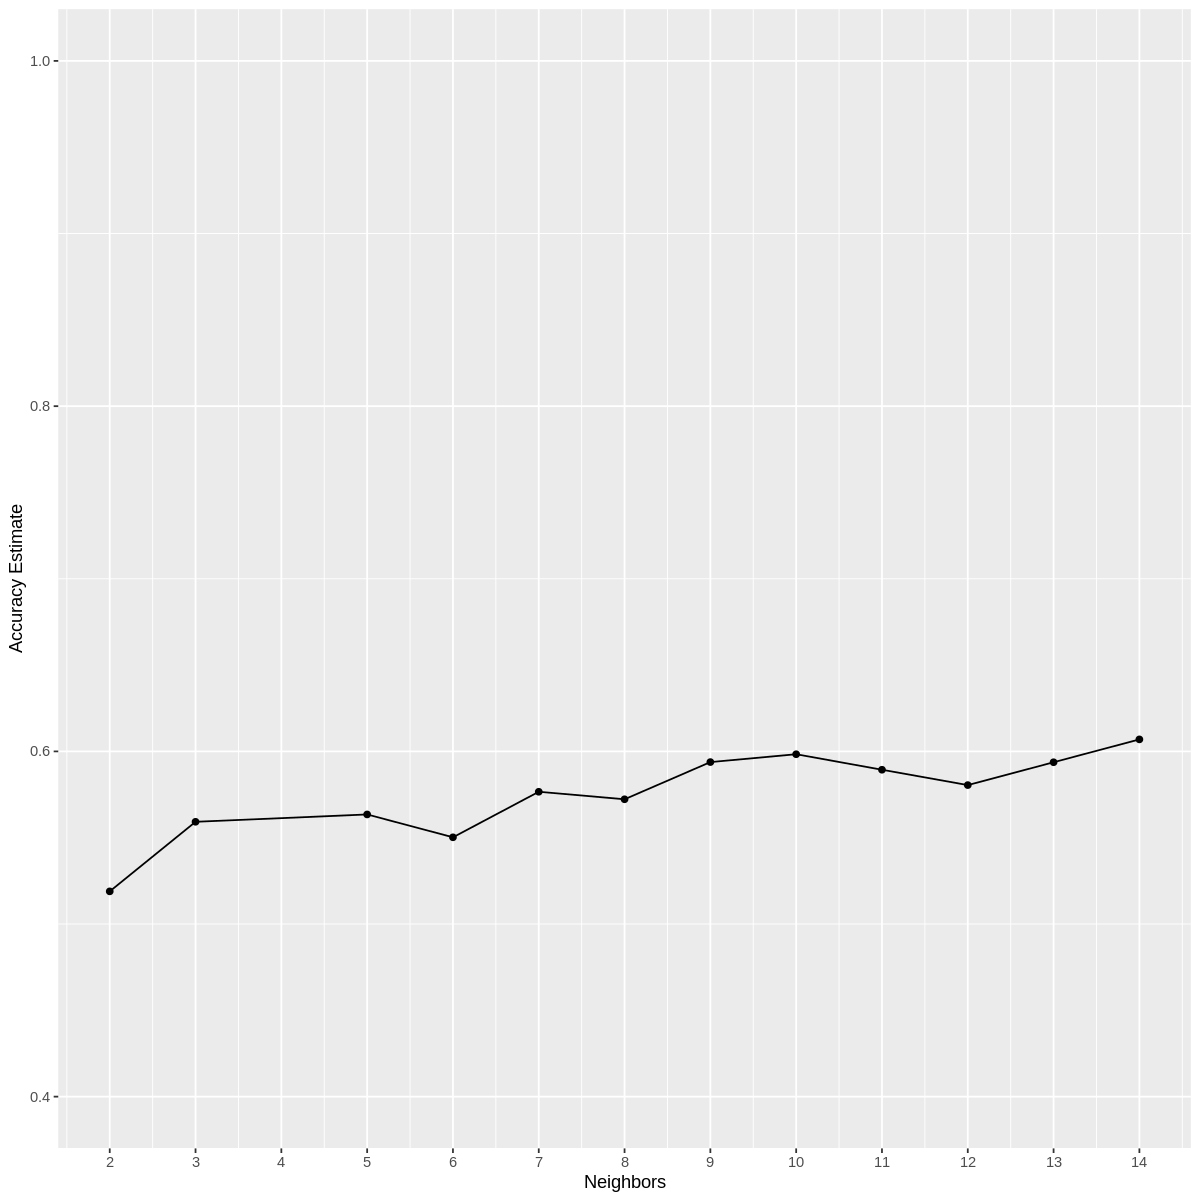

In [29]:
set.seed(2020)
## 5-fold cross validation
heart_recipe = recipe(restecg ~ ., data = heart_train) |>
                step_center(all_predictors()) |>
                step_scale(all_predictors())
heart_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
heart_vf <- vfold_cv(heart_train, v = 5, strata = restecg)

heart_results = workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec)|>
    tune_grid(resamples = heart_vf, grid = 15) |>
    collect_metrics()

heart_accuracies <- heart_results |> 
       filter(.metric == "accuracy", .estimator == "multiclass")

heart_accuracy_plot <- ggplot(heart_accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(1, 16, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1)) # adjusting the y-axis

heart_accuracy_plot

**Plot 1**: Finding the best k value using age, trestbps and chol.

According to the plot above, we choose k = 14 as it has the highest accuracy estimate. Use this k value in the `nearest_neighbors` and perform a workflow analysis using `workflow`, then use the `predict` function.

In [30]:
heart_retrain_spec = nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit = workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_retrain_spec) |>
       fit(data = heart_train)

heart_predictions <- predict(heart_fit , heart_test) |>
                    bind_cols(heart_test)

heart_metrics_1 <- heart_predictions |>
         metrics(truth = restecg, estimate = .pred_class)
heart_metrics_1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4285714
kap,multiclass,-0.1285809


**Table 2:** Shows the accuracy results of the first model from the training set.

In [31]:
heart_conf_mat <- heart_predictions |> 
       conf_mat(truth = restecg, estimate = .pred_class)
heart_conf_mat

                  Truth
Prediction         lv hypertrophy normal st-t abnormality
  lv hypertrophy               16     22                0
  normal                       21     17                1
  st-t abnormality              0      0                0

**Table 3:** Confusion Matrix of the first model.

#### Build a second model using age, trestbps to predict restecg by k-nn classification.

! Fold2: internal:
  No observations were detected in `truth` for level(s): 'st-t abnormality'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'st-t abnormality'
  Computation will proceed by ignoring those levels.



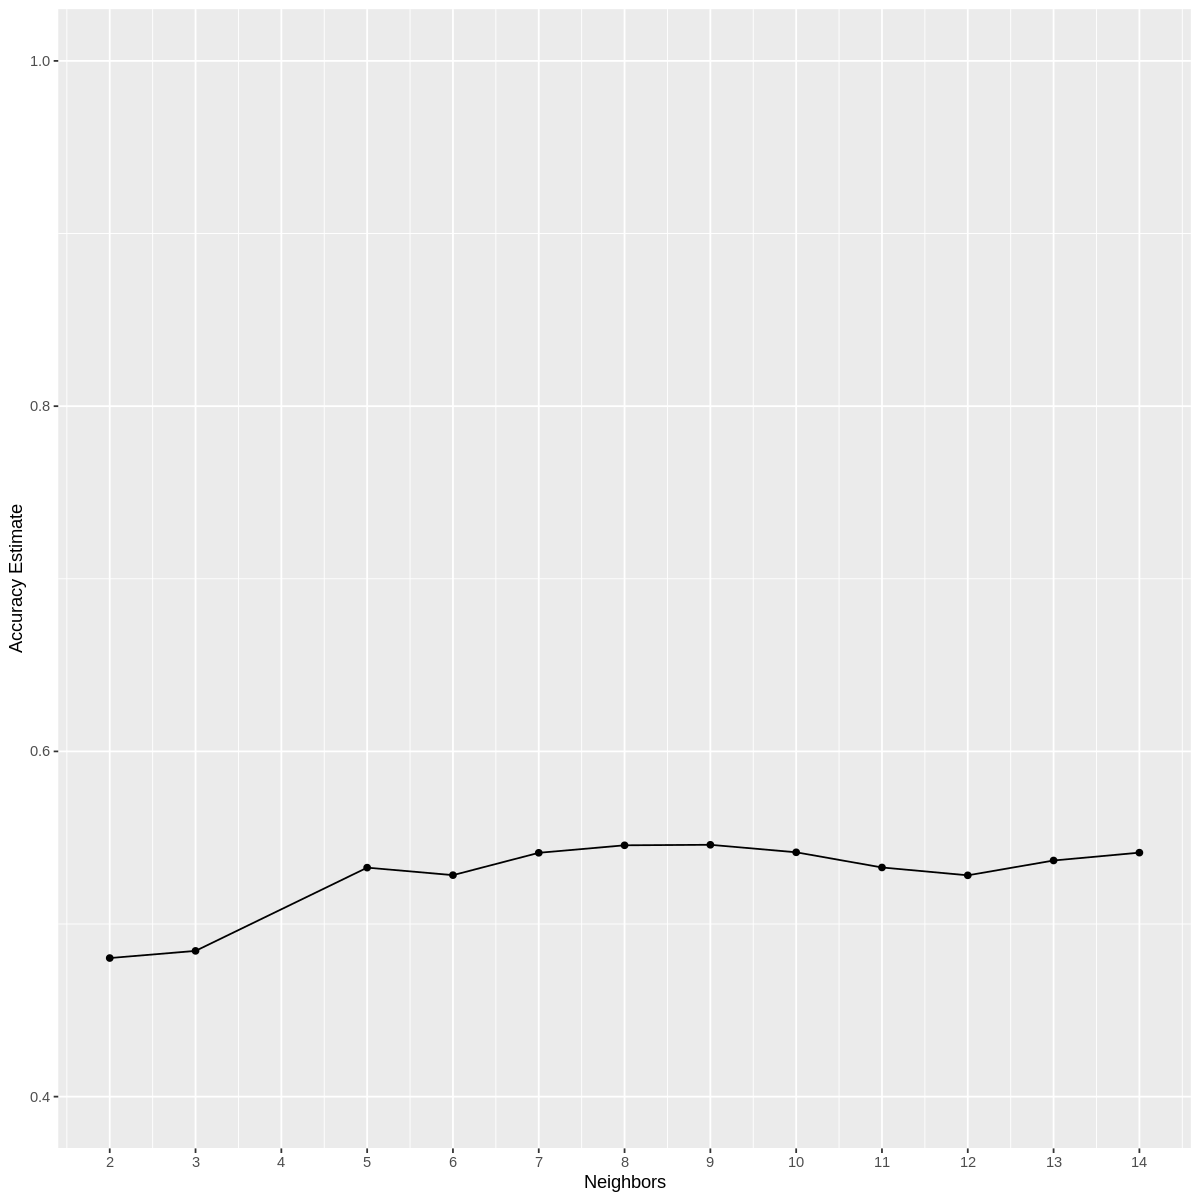

In [32]:
set.seed(2020)
## 5-fold cross validation
heart_recipe = recipe(restecg ~ age + trestbps, data = heart_train) |>
                step_center(all_predictors()) |>
                step_scale(all_predictors())

heart_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
heart_vf <- vfold_cv(heart_train, v = 5, strata = restecg)

heart_results = workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec)|>
    tune_grid(resamples = heart_vf, grid = 15) |>
    collect_metrics()

heart_accuracies <- heart_results |> 
       filter(.metric == "accuracy", .estimator == "multiclass")

heart_accuracy_plot <- ggplot(heart_accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(1, 16, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1)) # adjusting the y-axis

heart_accuracy_plot

**Plot 2:** K vs. Accuracy Estimate using age and trestbps.

According to the plot above, we choose k = 9 as it has the highest accuracy estimate.

In [33]:
heart_retrain_spec = nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit = workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_retrain_spec) |>
       fit(data = heart_train)

heart_predictions <- predict(heart_fit , heart_test) |>
                    bind_cols(heart_test)

heart_metrics <- heart_predictions |>
         metrics(truth = restecg, estimate = .pred_class)
heart_metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5584416
kap,multiclass,0.1308101


**Table 4:** Shows the accuracy results of the second model from the training set.

Use `conf_mat` function to produce the confusion matrix.

In [34]:
heart_conf_mat_2 <- heart_predictions |> 
       conf_mat(truth = restecg, estimate = .pred_class)
heart_conf_mat_2

                  Truth
Prediction         lv hypertrophy normal st-t abnormality
  lv hypertrophy               23     19                1
  normal                       14     20                0
  st-t abnormality              0      0                0

**Table 5:** Confusion Matrix of the second model.

#### Produce the third model using age and chol to predict restecg by k-nn classification.
Repeat the same steps above in order to produce another model based on age and cholesterol that predicts the value of restecg.

! Fold2: internal:
  No observations were detected in `truth` for level(s): 'st-t abnormality'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'st-t abnormality'
  Computation will proceed by ignoring those levels.



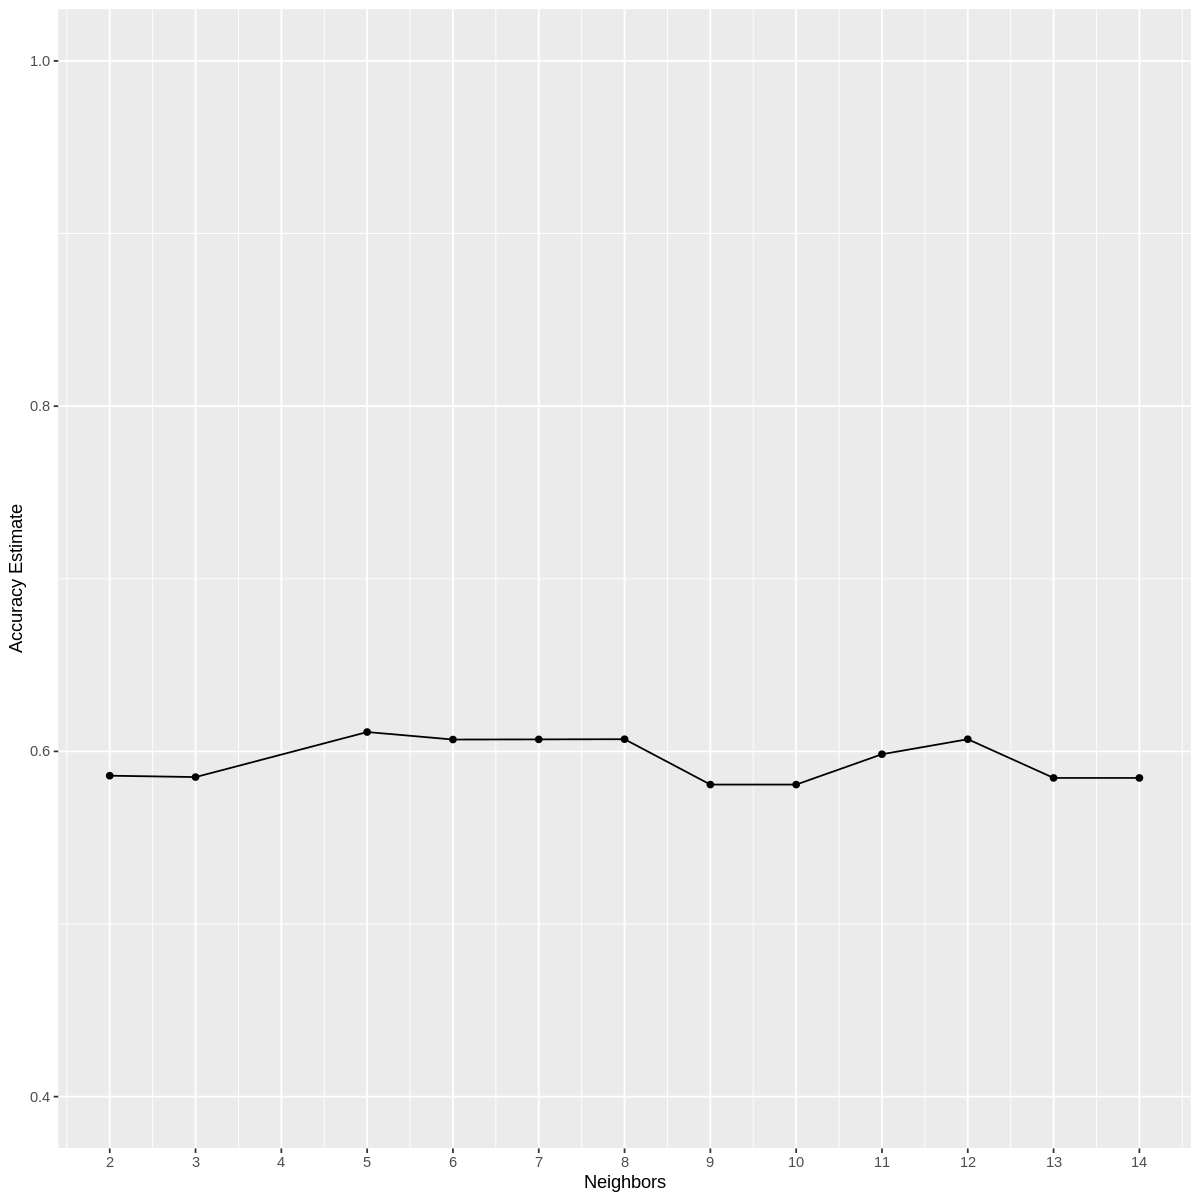

In [35]:
set.seed(2020)
## 5-fold cross validation
heart_recipe = recipe(restecg ~ age + chol, data = heart_train) |>
                step_center(all_predictors()) |>
                step_scale(all_predictors())

heart_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
heart_vf <- vfold_cv(heart_train, v = 5, strata = restecg)

heart_results = workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec)|>
    tune_grid(resamples = heart_vf, grid = 15) |>
    collect_metrics()

heart_accuracies <- heart_results |> 
       filter(.metric == "accuracy", .estimator == "multiclass")

heart_accuracy_plot <- ggplot(heart_accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(1, 16, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1)) # adjusting the y-axis

heart_accuracy_plot

**Plot 3:** K vs. Accuracy Estimate using age and chol.

According to the plot above, we choose k = 5 as it has the highest accuracy estimate.

In [36]:
heart_retrain_spec = nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit = workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_retrain_spec) |>
       fit(data = heart_train)

heart_predictions <- predict(heart_fit , heart_test) |>
                    bind_cols(heart_test)

heart_metrics <- heart_predictions |>
         metrics(truth = restecg, estimate = .pred_class)
heart_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.48051948
kap,multiclass,-0.02872411


**Table 6:** Shows the accuracy results of the third model from the training set.

In [37]:
heart_conf_mat_3 <- heart_predictions |> 
       conf_mat(truth = restecg, estimate = .pred_class)
heart_conf_mat_3

                  Truth
Prediction         lv hypertrophy normal st-t abnormality
  lv hypertrophy               16     18                0
  normal                       21     21                1
  st-t abnormality              0      0                0

**Table 7:** Confustion Matrix of the third model.

#### Finally, create the last model using trestbps and chol to predict restecg by k-nn classification.

! Fold2: internal:
  No observations were detected in `truth` for level(s): 'st-t abnormality'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'st-t abnormality'
  Computation will proceed by ignoring those levels.



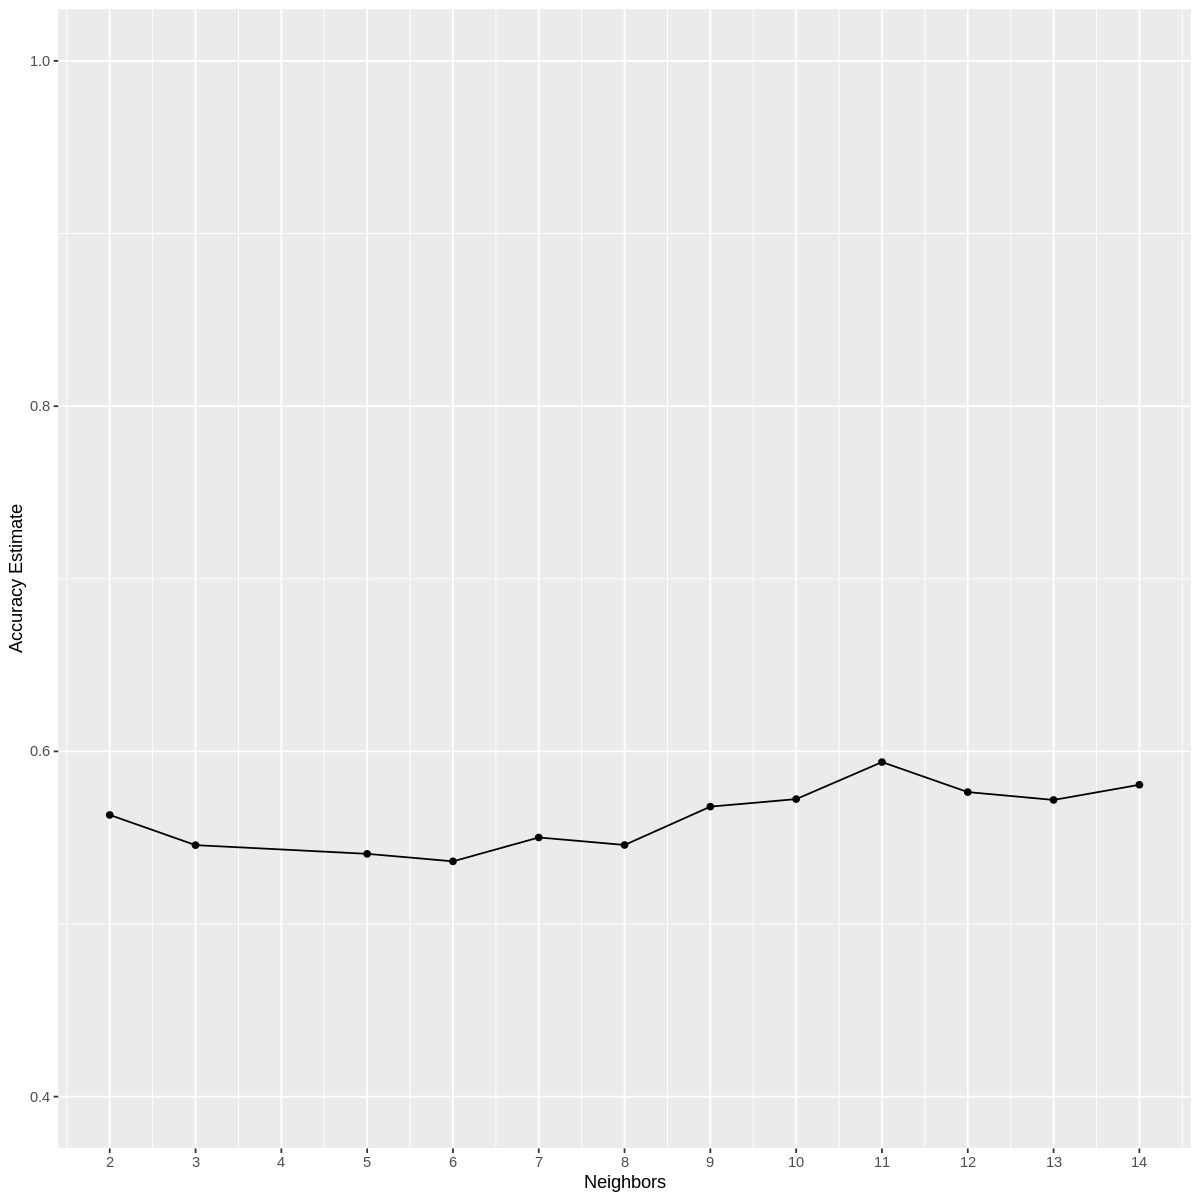

In [38]:
set.seed(2020)
## 5-fold cross validation
heart_recipe = recipe(restecg ~ trestbps + chol, data = heart_train) |>
                step_center(all_predictors()) |>
                step_scale(all_predictors())

heart_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
heart_vf <- vfold_cv(heart_train, v = 5, strata = restecg)

heart_results = workflow() |>
    add_recipe(heart_recipe) |>
    add_model(heart_spec)|>
    tune_grid(resamples = heart_vf, grid = 15) |>
    collect_metrics()

heart_accuracies <- heart_results |> 
       filter(.metric == "accuracy", .estimator == "multiclass")

heart_accuracy_plot <- ggplot(heart_accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(1, 16, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1)) # adjusting the y-axis

heart_accuracy_plot

**Plot 4:** K vs. Accuracy Estimate using trestbps and chol.

According to the plot above, we choose k = 11.

In [39]:
heart_retrain_spec = nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit = workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_retrain_spec) |>
       fit(data = heart_train)

heart_predictions <- predict(heart_fit , heart_test) |>
                    bind_cols(heart_test)

heart_metrics <- heart_predictions |>
         metrics(truth = restecg, estimate = .pred_class)
heart_metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4935064935
kap,multiclass,-0.0003331113


**Table 8:** Shows the accuracy results of the fourth model from the training set.

In [40]:
heart_conf_mat_4 <- heart_predictions |> 
       conf_mat(truth = restecg, estimate = .pred_class)
heart_conf_mat_4

                  Truth
Prediction         lv hypertrophy normal st-t abnormality
  lv hypertrophy               18     19                1
  normal                       19     20                0
  st-t abnormality              0      0                0

**Table 7:** Confusion Matrix of the fourth model.

### Scatterplots of each of the models
Use the `ggplot` function to create scatterplots of comparing `age` and `trestbps`, `age` and `chol`, and `trestbps` and `chol` to visualize the distribution.

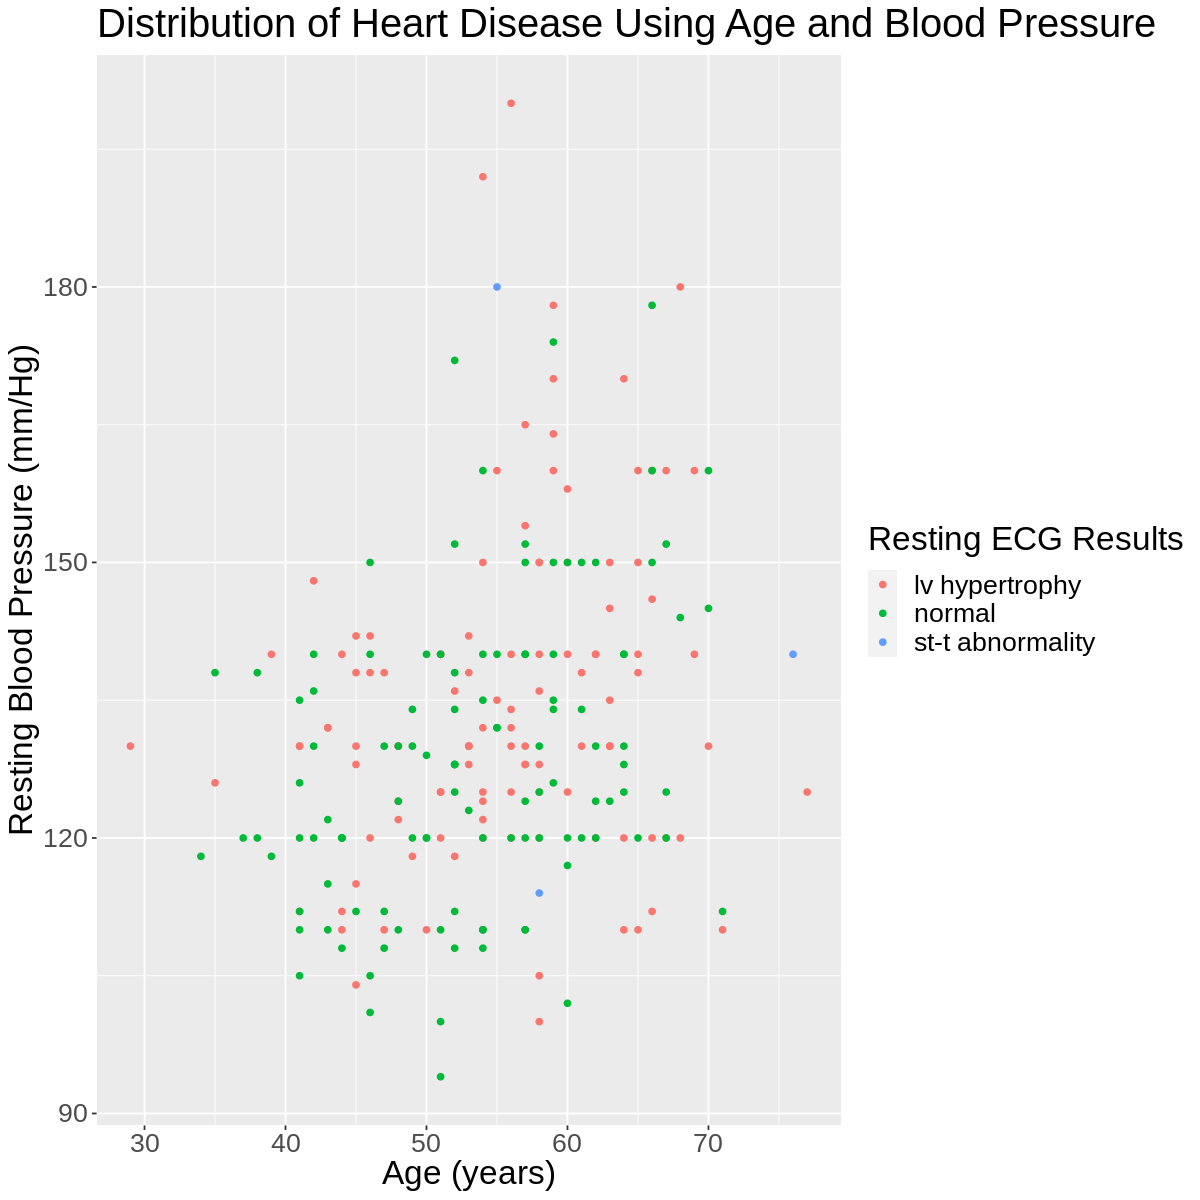

In [41]:
options(repr.plot.width=10, repr.plot.height=10)


hd_age_trestbps_plot <- ggplot(heart_train, aes(x=age, y = trestbps, colour = restecg )) +
    geom_point() +
    labs(x= "Age (years)", y="Resting Blood Pressure (mm/Hg)", color= "Resting ECG Results")+
    ggtitle("Distribution of Heart Disease Using Age and Blood Pressure") +
    theme(text=element_text(size=20))
hd_age_trestbps_plot

**Plot 5:** Scatterplot showing Age vs. Blood pressure, colored by Resting ECG results.

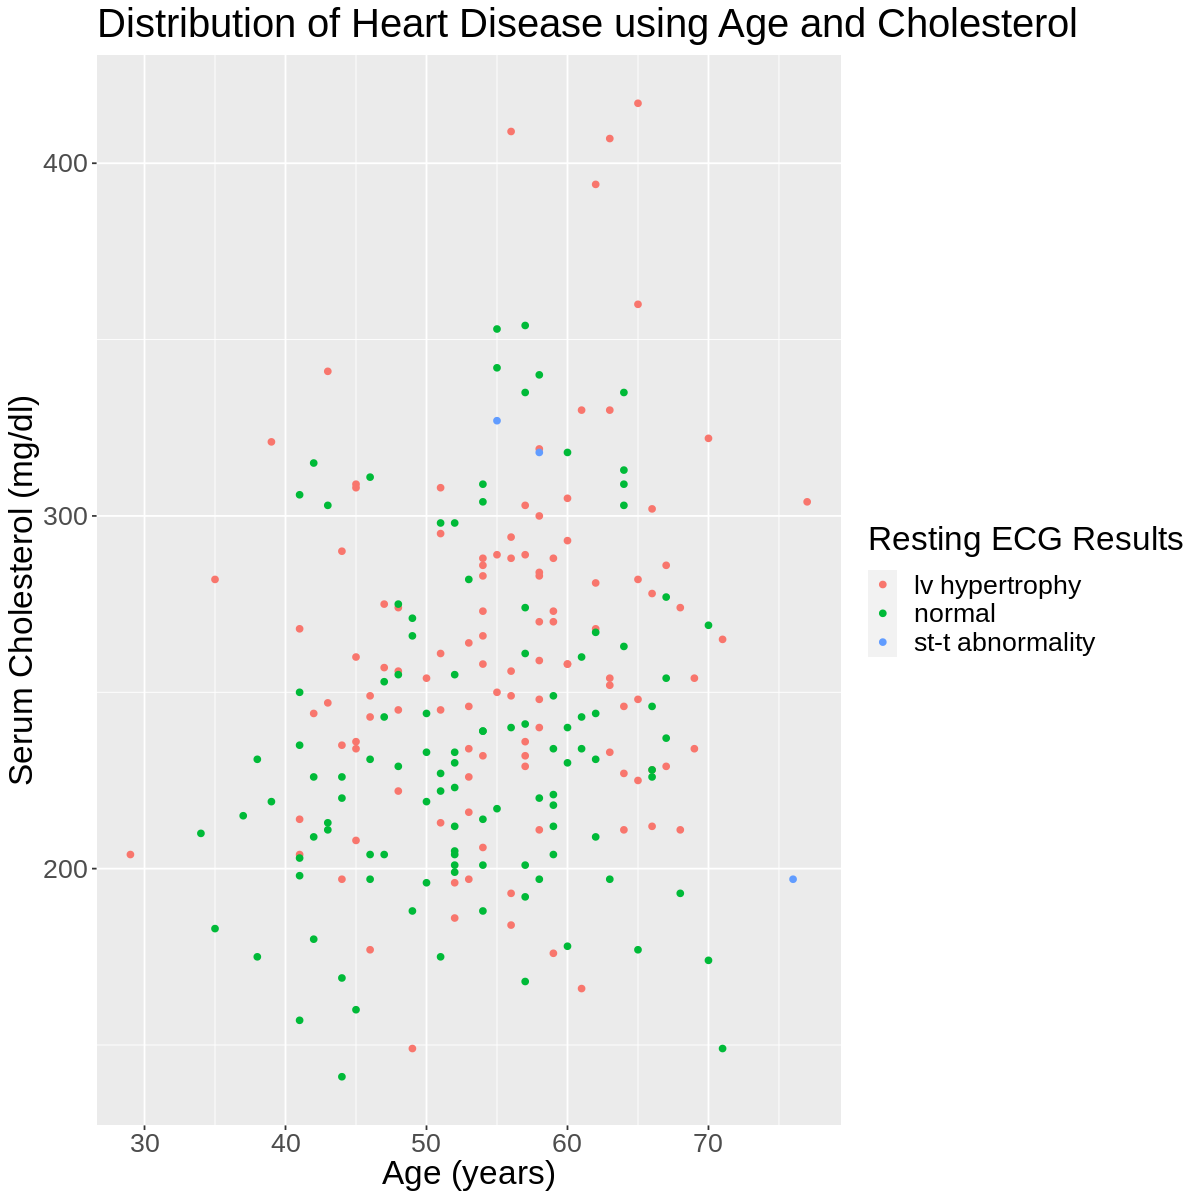

In [42]:
hd_age_chol_plot <- ggplot(heart_train, aes(x=age, y = chol, colour = restecg )) +
    geom_point() +
    labs(x= "Age (years)", y="Serum Cholesterol (mg/dl)", color= "Resting ECG Results")+
    ggtitle("Distribution of Heart Disease using Age and Cholesterol") +
    theme(text=element_text(size=20))
hd_age_chol_plot

**Plot 6:** Scatterplot showing Age vs. Cholesterol, colored by Resting ECG results.

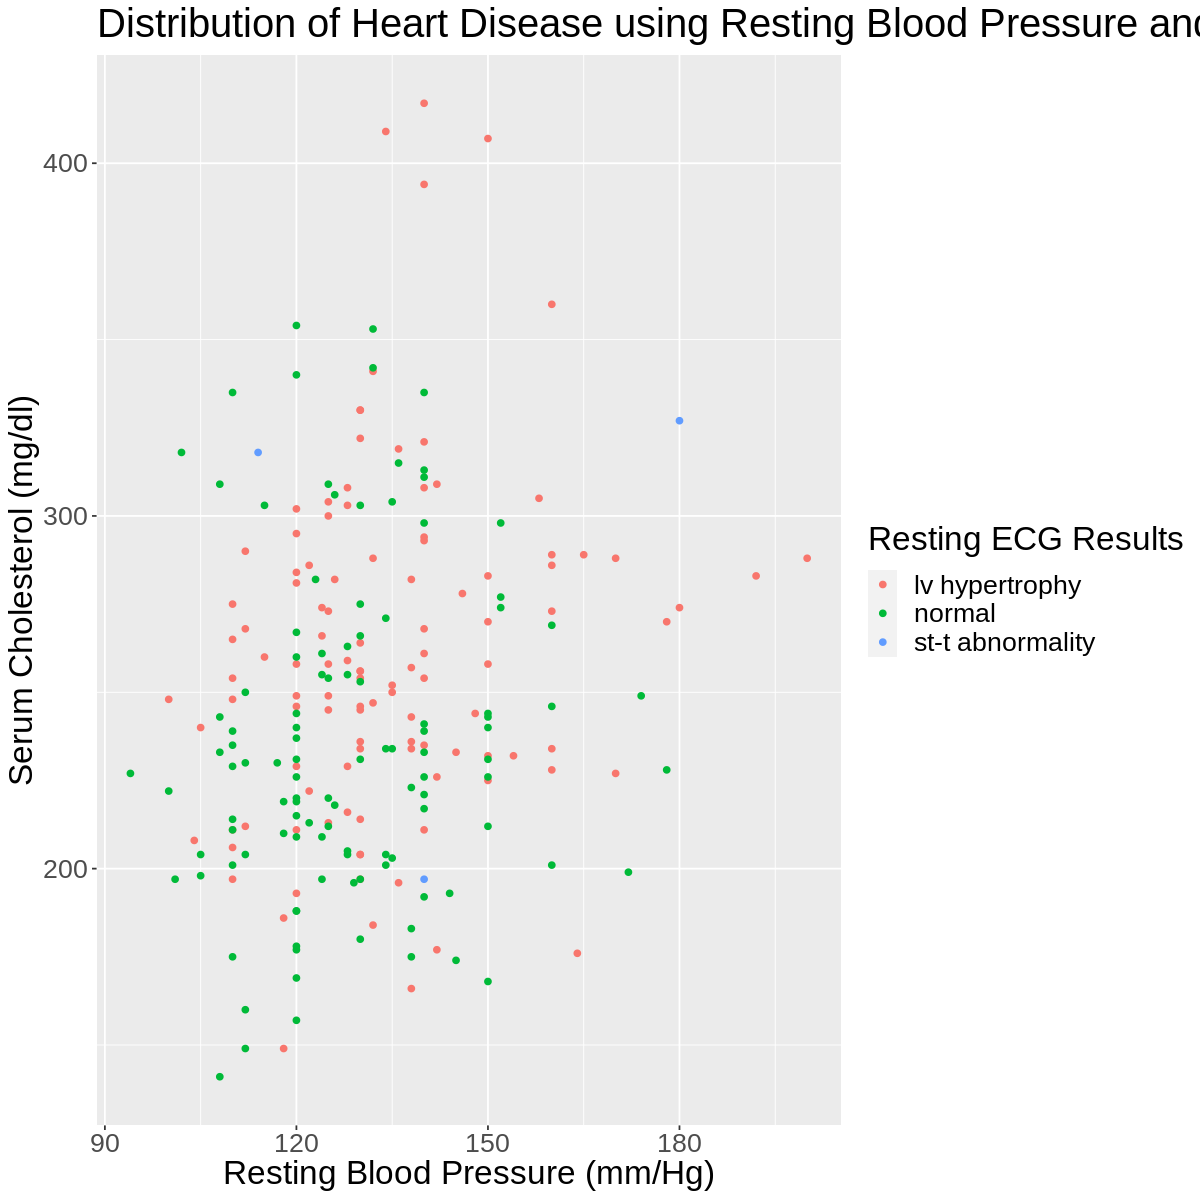

In [43]:
hd_chol_restbp_plot <- ggplot(heart_train, aes(x=trestbps, y = chol, colour = restecg )) +
    geom_point() +
    labs(x= "Resting Blood Pressure (mm/Hg)", y="Serum Cholesterol (mg/dl)", color= "Resting ECG Results")+
    ggtitle("Distribution of Heart Disease using Resting Blood Pressure and Cholesterol") +
    theme(text=element_text(size=20))
hd_chol_restbp_plot

**Plot 7:** Scatterplot showing Blood pressure and Cholesterol, colored by Resting ECG results.

#### Compare the accuracy rate of the four models (0.4285714, 0.5584416, 0.48051948, 0.4935064935) that we found from the k-nn classification model using age, trestbps to predict restecg has the highest accuracy. We think this model is the best model to predict restecg.

In [44]:
accuracy_comparison <- tibble(
    model=c(1,2,3,4),
    variables = c("age, trestbps and chol", "age and trestbps", "age and chol", "chol and trestbps"),
    accuracy = c(0.4285714, 0.5584416, 0.48051948, 0.4935064935))

accuracy_comparison

model,variables,accuracy
<dbl>,<chr>,<dbl>
1,"age, trestbps and chol",0.4285714
2,age and trestbps,0.5584416
3,age and chol,0.4805195
4,chol and trestbps,0.4935065


**Table 8:** Shows the accuracy of each of the four models with their corresponding variables.

### Discussion:


Using Table 8 and comparing the accuracy rates of the four models we produced, we can see that using the variables age and trestbps (in our second model) produced the highest accuracy (0.56) for our prediction model. This suggests that these two factors taken together are most associated with abnormal or lv hypertrophic resting ECG than the combinations in other models, which have accuracies under 50%. In other words, a relatively older person with a high resting blood pressure will either have left ventricular hypertrophy, or abnormal resting ECG approximately six out of ten times. This is what we expected in terms of higher age and resting blood pressure to show signs of left ventricular hypertrophy or abnormal resting ECG. However, we also expected the same results with higher cholesterol levels as well. Based on our findings, cholesterol paired with our other variables  seems to take part in left ventricular hypertrophy or abnormal resting ECG , but not as big of a role as age and resting blood pressure. This could be seen through the rest of the models.  In our first model, the accuracy was 0.43, which took age, resting blood pressure, and cholesterol into account. Our third and fourth models took both cholesterol into consideration, but paired with either age or resting blood pressure and showed similar accuracies of 0.48 and 0.49, respectively. Previous scientific literature suggests that there is a positive correlation between left ventricular hypertrophy or abnormal ecg with the presence of heart disease. According to research we cited,  age, resting blood pressure, and cholesterol are highly related to heart disease, but the accuracies of three of our models are lower than 50%. We think the possible reason is that resting ECG cannot represent heart disease perfectly, or the three pairs of variables with accuracy <50% are factors that do not contribute as much to left ventricular hypertrophy.  

#### Drawbacks: 
Since previous research has repeatedly shown that higher age, cholesterol and resting blood pressure contribute to heart disease (CDC, 2023), we believe that using resting ECG as the only predictive factor for heart disease might be an exaggeration. Another model exploring the relationship between resting ECG and heart disease should be made in order to rectify this shortcoming of our project. Moreover, since our dataset consisted of only 4 subjects who had an st-t abnormal resting ECG, we cannot confidently say that our models perform the best job at  correlating age, resting blood pressure, and cholesterol on st-t abnormal resting ECG. With this in mind, we cannot calculate the accuracy for st-t abnormal ECG as there were 0 hits (i.e. when truth and prediction both say st-t abnormal ECG) in all four confusion matrices that were produced. We also used pairs of predictors for the last three models, instead of exploring their relationship with resting ECG individually. Thus, our classification models can only attempt to explain the effect of pairs of variables (eg, high cholesterol and older age) on resting ECG, instead of singular variables (eg, high cholesterol) on resting ECG. Further analysis with individual variables should also be done in order to define the relationship between singular variables and resting ECG. 

#### Significance:
These findings would be significantly helpful for the medical field and public health. By being able to identify risk factors from the predictive models, it could help healthcare providers to not only detect the signals of heart diseases early, but also improve their diagnostic accuracy. This would allow for effective interventions, which could lead to a reduction in heart disease severity.  Specifically, it could contribute to finding the most suitable treatment plans and medication for each patient’s needs when taking into account their specific risk factors and characteristics; therefore improving patients’ outcomes. The predictive models could also help to identify people with the highest risk of heart diseases based on our predictors. Since this information could be made available to the public, they could recognize the risk they are in. Thus, they could monitor their health regularly and make the corresponding modifications on their lifestyle to reduce the risks of onset heart diseases, promoting cardiovascular health. Moreover, since being able to detect heart diseases early on could reduce the severity and risk of heart diseases, these findings will aid in reducing the healthcare costs from less expensive medical procedures for individuals and limited healthcare resources in general. 

#### Some Questions This Could Lead To:
Since these findings on predicting the risk factors of heart diseases can foster further discussions, which may result in new directions for further research, there are some questions this could lead to: 
 
- How can the variables be treated in the future in order to mitigate the chance of heart disease?
- How can we further improve the accuracy of our predictive model?
- How can these findings on risk factors be effectively integrated in medical practices and be publicly available for individuals to use?
- How can we take into account or exclude the confounders that can possibly contribute to heart diseases in our predictive model, such as genetic and environmental factors? 
- Are there other factors (not included in the given dataset) that could be used more effectively? 


### References:

Bhatt et al. (Sep 1, 2017). “Prevalence of electrocardiographic abnormalities based on hypertension severity and blood pressure levels: The REasons for Geographic and Racial Differences in Stroke (REGARDS) study”. Journal of the American Society of Hypertension, Elsevier BV. 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5012944/

Choosing Wisely Canada. “ECG (Electrocardiogram): When you need it—and when you don’t”. https://choosingwiselycanada.org/wp-content/uploads/2017/05/ECG-EN.pdf

Ebong et al. (Apr 10, 2012). “Electrocardiographic Abnormalities Associated with the Metabolic Syndrome and Its Components: The Multi-Ethnic Study of Atherosclerosis”. Metabolic Syndrome and Related Disorders, vol. 10, no. 2, Mary Ann Liebert, Inc., pp. 92–97. 
​​https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3339381/#:~:text=After%20adjusting%20for%20age%2C%20ethnicity,with%20major%20ECG%20abnormality%20only.

Heart and Stroke Foundation of Canada. “Electrocardiogram.”
https://www.heartandstroke.ca/heart-disease/tests/electrocardiogram#:~:text=An%20electrocardiogram%20(ECG%20or%20EKG,pump%20blood%20from%20the%20heart.

Khane, Rupali Sachin et al. (Sep 8, 2011) “Changes in ECG pattern with advancing age.” Journal of basic and clinical physiology and pharmacology. vol. 22,4 97-101. doi:10.1515/JBCPP.2011.017
https://www.researchgate.net/publication/230620420_Changes_in_ECG_pattern_with_advancing_age

Mayo Clinic (March 19, 2022). “Electrocardiogram (ECG or EKG)” | Tests & Procedure. 
https://www.mayoclinic.org/tests-procedures/ekg/about/pac-20384983


Mayo Clinic (May 4, 2022). “Enlarged heart”. https://www.mayoclinic.org/diseases-conditions/enlarged-heart/symptoms-causes/syc-20355436#:~:text=If%20you%20have%20high%20blood,grow%20larger%20and%20become%20weak.

“Normal ECG”
https://elentra.healthsci.queensu.ca/assets/modules/ECG/normal_ecg.html
  
Sony, Md. R. K. (2020, September 23). UCI Heart Disease Data. Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data 